<a href="https://colab.research.google.com/github/kaushaln1/ML_DM_labs/blob/main/ML/HW_1_Excercise_1_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import numpy as np
rng = np.random.default_rng()

from matplotlib import pyplot as plt

In [ ]:
# parameters of experiments for LFD Exercise 1.4
mu = 0.5
num_coins = 1000
num_flips = 10
num_trials = 10000

In [ ]:
import random
def run_experiment(num_coins, num_flips, mu):

    """
    Run the experiment
    Input:
        num_coins: an integer
        num_flips: an integer
        mu: a real number in the interval [0.0, 1.0]
    Output:
        coin_flips: a 2D num_coins x num_flips array
                    the i-th row represents the i-th coin and j-th column represents the j-th coin flip
                    the i,j-th entry represents the j-th coin flip of the i-th coin
                    record H as 1 and T as 0
    Since coin flips are all i.i.d. and coins are identical, it will be okay to treat all coin flips in the same way
    """
    #TODO complete the function implementation
    #Hint - Can use a random number generator to simulate the experiments
    coin_flips =  []
    for _ in range(num_coins):
      flips = []
      for _ in range(num_flips):
        flips.append(random.randint(0, 1))
      coin_flips.append(flips)
    coin_flips= np.array(coin_flips)
    return coin_flips

In [ ]:
def run_trials(num_coins, num_flips, num_trials, mu):
    """
    Run num_trials number of trials of the coin flips experiment with
    num_coins coins and num_flips flips of each coin
    Input:
        num_coins: an integer
        num_flips: an integer
        num_trials: an integer
        mu: a real number in the interval [0.0, 1.0]
    Output:
        results: a 2D num_trials x 3 array
                 the i-th row represents the i-th trial
                 column 1 represents the fraction of heads recorded for the first coin
                 column 2 represents the fraction of heads recorded for a randomly picked coin
                 column 3 represents the fraction of heads recorded from the coin
                          that turned up heads the smallest number of times
    """
    results = np.zeros((num_trials, 3))
    for trial in range(num_trials):
        # run the experiment: flip num_coins coins num_flips number of times
        coin_flips = run_experiment(num_coins, num_flips, mu)
        # record the fraction of heads for the first coin
        results[trial, 0] = np.sum(coin_flips[0,:])/num_flips
        # record the fraction of heads for a randomly selected coin
        rand_coin_idx = rng.integers(low=0, high=num_coins-1, size=None)
        results[trial, 1] = np.sum(coin_flips[rand_coin_idx,:])/num_flips
        # record the fraction of heads for the coin with smallest number of heads
        min_coin_idx = np.argmin(np.sum(coin_flips, axis=1))
        results[trial, 2] = np.sum(coin_flips[min_coin_idx,:])/num_flips
    return results

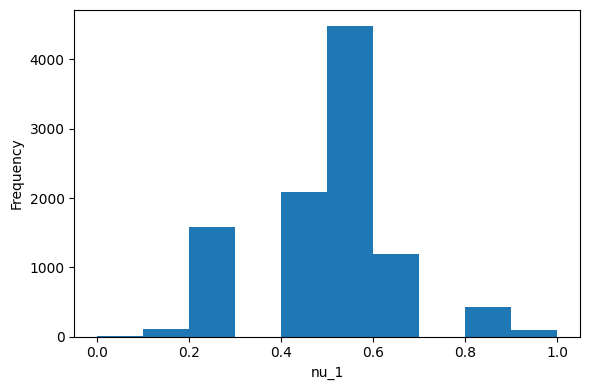

In [ ]:
#TODO Produce plots for LFD Exercise 1.10 (c)
results = run_trials(num_coins, num_flips, num_trials, mu)
nu_1 = results[:, 0]
# Hint -  plot histograms for the above three computed result columns use the below logic used for one plot
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.hist(nu_1, bins=np.arange(0, 1.1, 0.1))
ax.set_xlabel(r'nu_1')
ax.set_ylabel(r'Frequency')
plt.show()


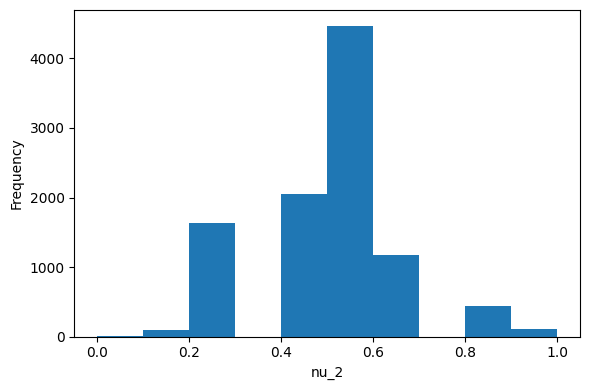

In [ ]:
nu_2 = results[:,1]
# Hint -  plot histograms for the above three computed result columns use the below logic used for one plot
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.hist(nu_2, bins=np.arange(0, 1.1, 0.1))
ax.set_xlabel(r'nu_2')
ax.set_ylabel(r'Frequency')
plt.show()

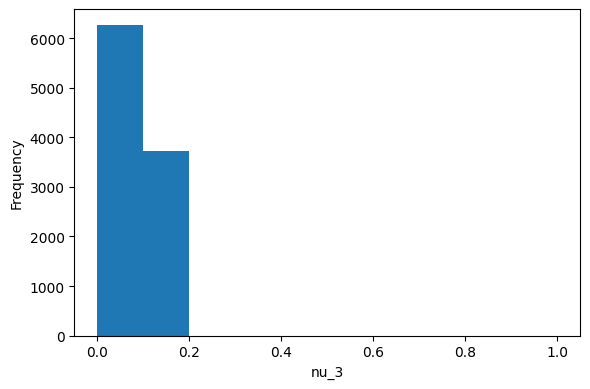

In [ ]:
nu_3 = results[:,2]
# Hint -  plot histograms for the above three computed result columns use the below logic used for one plot
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.hist(nu_3, bins=np.arange(0, 1.1, 0.1))
ax.set_xlabel(r'nu_3')
ax.set_ylabel(r'Frequency')
plt.show()

In [ ]:
def observed_bad_events(nu, mu, epsilon):
    """
    Compute observed fraction of trials for which |nu - mu| > epsilon
    Input:
        nu: a 1D array
        mu: a real number in the interval [0.0, 1.0]
        epsilon: a real number in the interval [0.0, 1.0]
    Output:
        frac: a real number, the fraction of values in the list nu for which |nu - mu| > epsilon
    """
    #TODO Complete the function implementation
    count = 0
    for item in nu:
        dif = abs(item - mu)
        if dif > epsilon:
            count += 1

    res = count / len(nu)
    return res

In [ ]:
def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

In [ ]:
def plot_estimates_of_bad_events(results, mu):
    """
    Produce plots for LFD Exercise 1.10 (c)
    Input:
        results: a 2D num_trials x 3 array
                 the i-th row represents the i-th trial
                 column 1 represents the fraction of heads recorded for the first coin
                 column 2 represents the fraction of heads recorded for a randomly picked coin
                 column 3 represents the fraction of heads recorded from the coin
                          that turned up heads the smallest number of times
        mu: a real number in the interval [0.0, 1.0]
    Output:
        None
    """
    all_epsilons = np.arange(0.01, 1+0.001, 0.001)
    nu_1 = results[:, 0]
    nu_rand = results[:, 1]
    nu_min = results[:, 2]
    bad_frac_1 = [observed_bad_events(nu_1, mu, eps) for eps in all_epsilons]
    bad_frac_rand = [observed_bad_events(nu_rand, mu, eps) for eps in all_epsilons]
    bad_frac_min = [observed_bad_events(nu_min, mu, eps) for eps in all_epsilons]
    #TODO generate Hoeffding as per 1.10 (c)
    Hoeffding =  hoeffding_bound(all_epsilons,num_flips)

    # TODO with the above data complete the plotting logic below to show a plot
    #Hint generate a plot for each case which shows all three curves in one plot refer to one example plot below :
    plt.figure(figsize=(6,4))
    plt.plot(all_epsilons, Hoeffding, marker='o', markerfacecolor='orange', markersize=5, color='pink', label='Hoeffding Bound')
    plt.plot(all_epsilons, bad_frac_1, color='b', label=r'c_1', linestyle='dashed')
    plt.plot(all_epsilons, bad_frac_rand, color='r', label=r'c_2', linestyle='dashed')
    plt.plot(all_epsilons, bad_frac_min, color='g', label=r'c_3', linestyle='dashed')
    plt.xlabel(r'Epsilon')
    plt.ylabel(r'Hoeffding Value')

    #your other two plots go her
    plt.legend()
    plt.show()
    return None


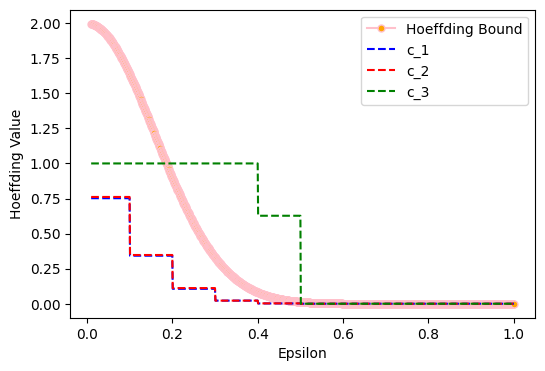

In [ ]:
plot_estimates_of_bad_events(results, mu)

In [ ]:
results = run_trials(num_coins, num_flips, 1, mu)
print(results[:,0], results[:,1], results[:,2])

[0.7] [0.4] [0.]


Question (Problem 1.7)

In [ ]:
def P(sampleSpace, trials, epsilon_space, mu):
    k = np.random.binomial(n=N,p=mu,size=(1000, trials))
    P = np.abs(k/sampleSpace - mu).max(axis=1)
    return [(P > epsilon).mean() for epsilon in epsilon_space]

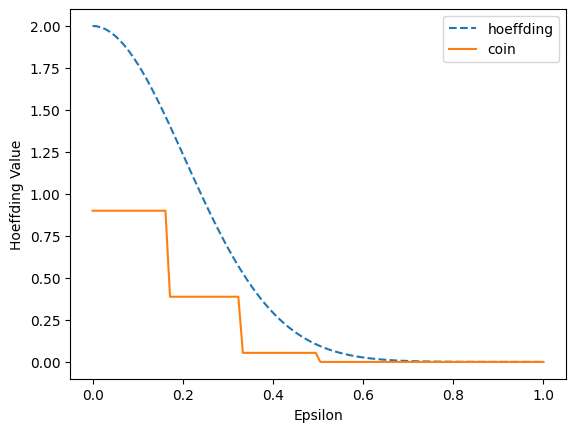

In [ ]:
epsilon_space = np.linspace(0, 1, 100)
N = 6
M = 2
mu = 0.5
a=plt.plot(epsilon_space, hoeffding_bound(epsilon_space, N), '--',label=r'hoeffding')
b= plt.plot(epsilon_space, P(6, 2, epsilon_space, mu), label=r'coin')
plt.xlabel(r'Epsilon')
plt.ylabel(r'Hoeffding Value')
plt.legend()
plt.show()